# Исследование объявлений о продаже квартир <a id="head"></a>

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

**Задача:** выполнить предобработку данных, изучить их, найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Данная информация позволит построить автоматизированную систему, которая она отследит аномалии и мошенническую деятельность.

<h4>Содержание:<span class="tocSkip"></span></h4>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация--" data-toc-modified-id="Общая-информация---1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация  <a id="inf" rel="nofollow"></a></a></span></li><li><span><a href="#Предобработка-данных--" data-toc-modified-id="Предобработка-данных---2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных  <a id="preprocessing" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения-" data-toc-modified-id="Пропущенные-значения--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные значения <a id="missing" rel="nofollow"></a></a></span></li><li><span><a href="#Типы-данных-" data-toc-modified-id="Типы-данных--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных <a id="types" rel="nofollow"></a></a></span></li><li><span><a href="#Устранение-не-явных-дубликатов-" data-toc-modified-id="Устранение-не-явных-дубликатов--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение не явных дубликатов <a id="duplicate" rel="nofollow"></a></a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения-" data-toc-modified-id="Редкие-и-выбивающиеся-значения--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Редкие и выбивающиеся значения <a id="rare" rel="nofollow"></a></a></span></li><li><span><a href="#Добавдение-новых-столбцов-" data-toc-modified-id="Добавдение-новых-столбцов--2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Добавдение новых столбцов <a id="new" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-" data-toc-modified-id="Исследовательский-анализ--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ <a id="analis" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Параметры-объектов--" data-toc-modified-id="Параметры-объектов---3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметры объектов  <a id="parameters" rel="nofollow"></a></a></span></li><li><span><a href="#Продажа-недвижимости-" data-toc-modified-id="Продажа-недвижимости--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Продажа недвижимости <a id="sale" rel="nofollow"></a></a></span></li><li><span><a href="#Факторы,-влияющие-на-общую-стоимость-объекта--" data-toc-modified-id="Факторы,-влияющие-на-общую-стоимость-объекта---3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Факторы, влияющие на общую стоимость объекта  <a id="factors" rel="nofollow"></a></a></span></li><li><span><a href="#Cредняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-" data-toc-modified-id="Cредняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений--3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений <a id="str" rel="nofollow"></a></a></span></li><li><span><a href="#Средняя-цена-каждого-километра-" data-toc-modified-id="Средняя-цена-каждого-километра--3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Средняя цена каждого километра <a id="str2" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Вывод-" data-toc-modified-id="Вывод--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод <a id="and" rel="nofollow"></a></a></span></li></ul></div>

**Описание данных:**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Общая информация  <a id="inf"></a> 

In [1]:
# загрузка библиотек
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
# Откроем файл с помощью библиотеки pandas
import pandas as pd
data = pd.read_csv('datasets/real_estate_data.csv')

In [3]:
# Выведем первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# Изучим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

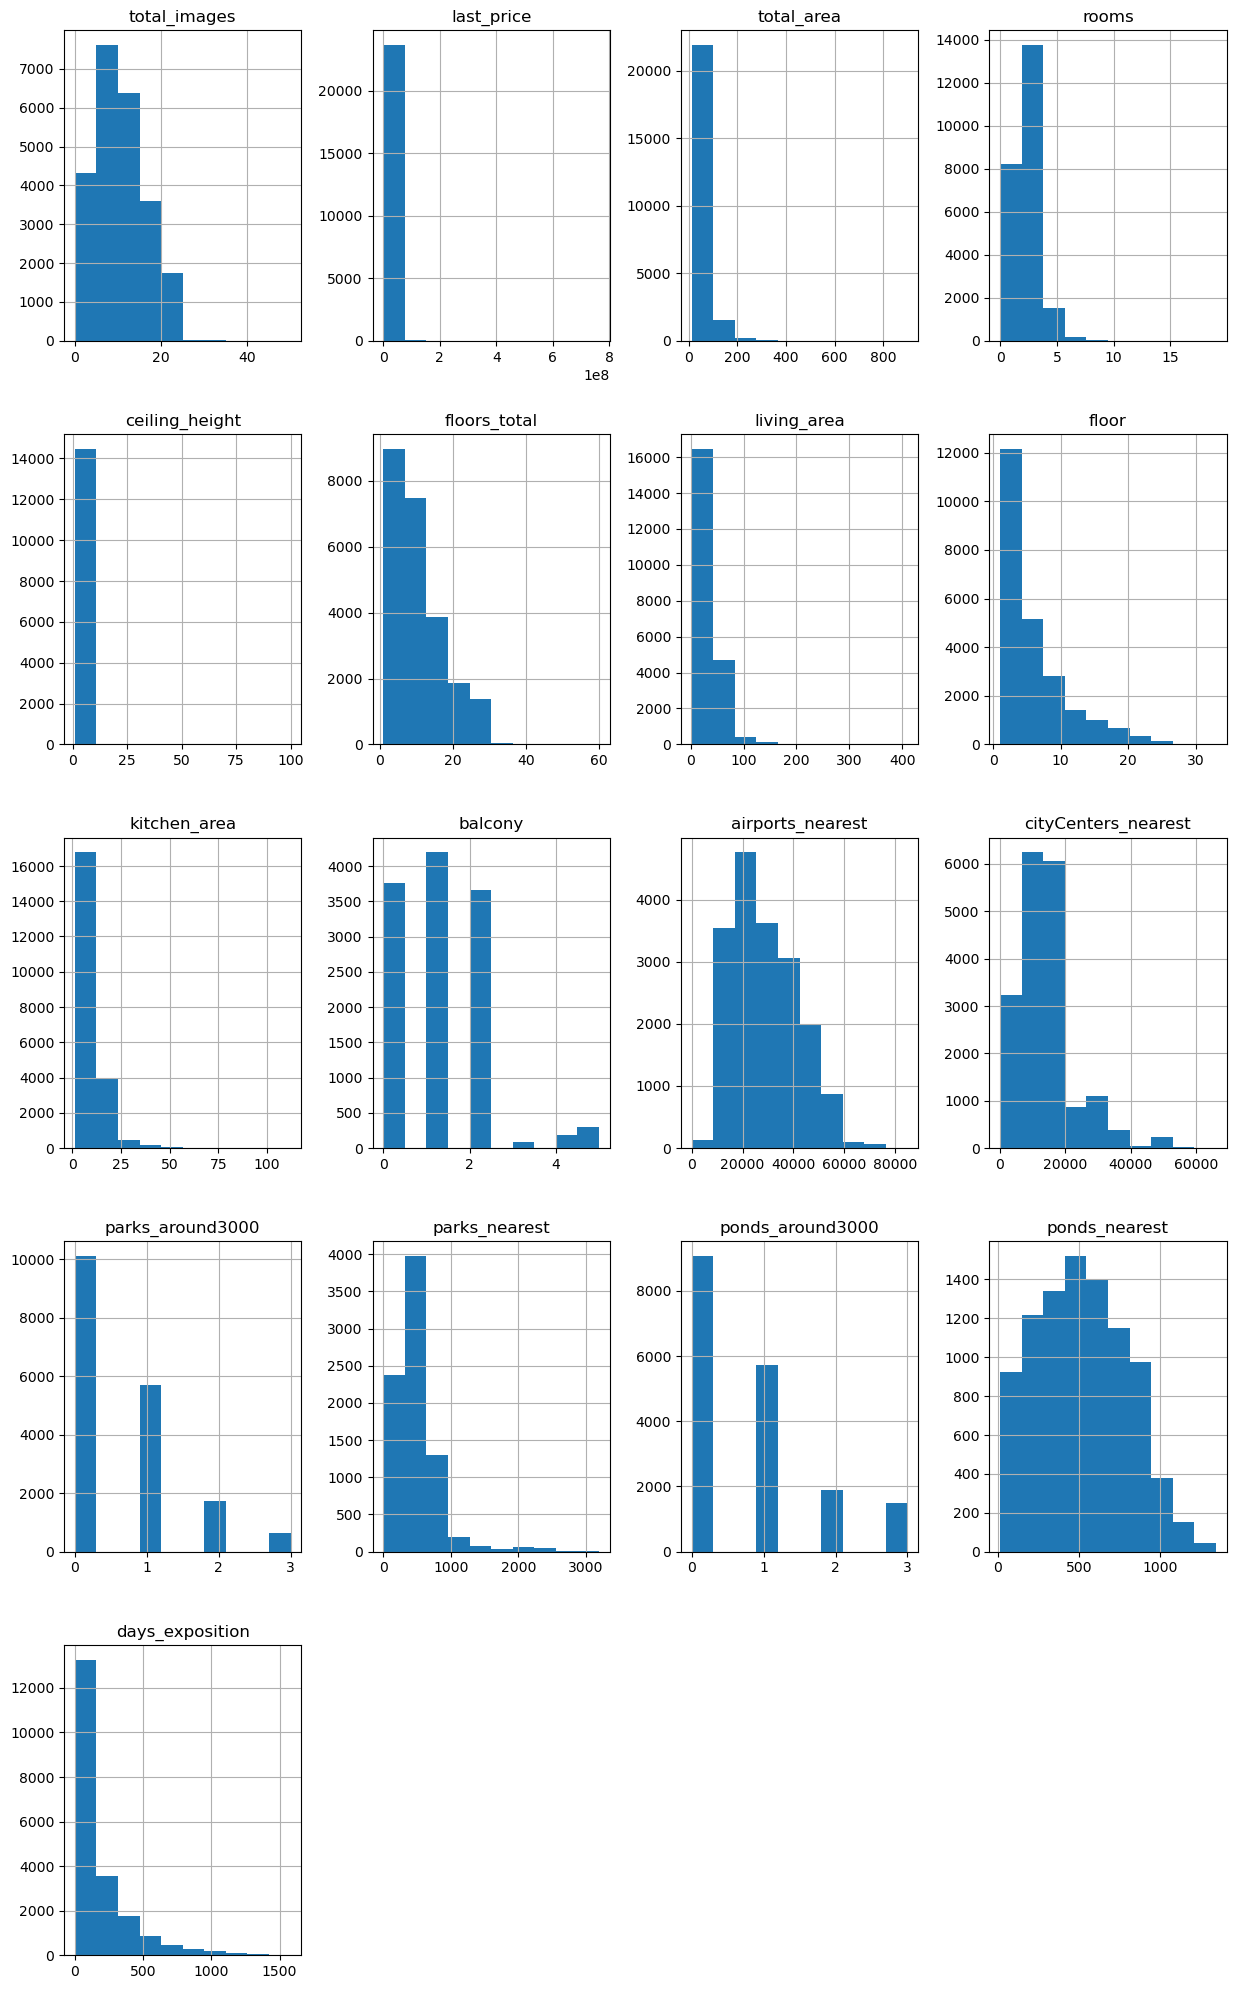

In [5]:
# Постоим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 25));

Видим, что есть пустые значения, например в колонке апартаменты, и аномальные значения, например количество балконов более 4.

## Предобработка данных  <a id="preprocessing"></a>

### Пропущенные значения <a id="missing"></a>

In [6]:
# Посчитаем пропущенные значения в колоках
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных большое количество пропусков, заполним их логически.

In [7]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

In [8]:
# Если медианное значение общей площади меньше этажа, на котором находится квартира, то в пропуск записываем этаж квартры,
# в ином случае можем сохранить медианное значение. 
median = data['floors_total'].median()
def floors_total_median(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if median <= floor:
        floors_total=floor
    else:
        floors_total = median
    return floors_total
         
data.loc[data['floors_total'].isna(), 'floors_total'] = data.apply(floors_total_median, axis=1)

In [9]:
warnings.filterwarnings("ignore")

In [10]:
# Есть типичные постройки, в которых высота потолков одинаковая. Заполним пропуски медианным значенем по количеству этажей в доме. 
for t in data['floors_total'].unique():
    median = data.loc[data['floors_total'] == t, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == t), 'ceiling_height'] = median

# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполниv оставшиеся пропуски медианой по всему датасету.
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [11]:
# Есть типичные постройки, в которых жилая площадь одинаковая. Заполним пропуски медианным значенем по количеству комнат. 
for t in data['rooms'].unique():
    median = data.loc[data['rooms'] == t, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == t), 'living_area'] = median

In [12]:
# Есть типичные постройки, в которых жилая площадь одинаковая. Заполним пропуски медианным значенем по количеству комнат. 
for t in data['rooms'].unique():
    median = data.loc[data['rooms'] == t, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == t), 'kitchen_area'] = median
    
#оставшиеся пропуски относятся к апартаментам, поэтому площадь проровняем к 0
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = 0

In [13]:
# Заполним пропуски медианным значениям по названиям населённого пункта
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == t), 'airports_nearest'] = median

# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполнить оставшиеся пропуски медианой по всему датасету.
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()

In [14]:
# Заполним пропуски медианным значениям по названиям населённого пункта
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'parks_around3000'].median()
    data.loc[(data['parks_around3000'].isna()) & (data['locality_name'] == t), 'parks_around3000'] = median

# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполнить оставшиеся пропуски медианой по всему датасету.
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = data['parks_around3000'].median()

In [15]:
# пустые значения в колонке расстояния до парка соответвуют отсутвием парка в радиусе 3км, поэтому заполним их 0
data.query('parks_around3000 == 0 and parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,26757.5,NaN,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,30.50,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,26757.5,NaN,0.0,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,26757.5,NaN,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,26757.5,NaN,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,NaN,...,8.80,NaN,село Рождествено,26757.5,NaN,0.0,NaN,NaN,NaN,95.0


In [16]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0), 'parks_nearest'] = 0
#Оставшийся пропуск заполним медианным значением по названиям населённого пункта
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == t), 'parks_nearest'] = median

In [17]:
# Заполним пропуски медианным значениям по названиям населённого пункта
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'ponds_around3000'].median()
    data.loc[(data['ponds_around3000'].isna()) & (data['locality_name'] == t), 'ponds_around3000'] = median

# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполнить оставшиеся пропуски медианой по всему датасету.
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = data['ponds_around3000'].median()

In [18]:
# пустые значения в колонке расстояния до водоёма соответвуют отсутвием водоёма в радиусе 3км, поэтому заполним их 0
data.query('ponds_around3000 == 0 and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.66,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24.0,30.5,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,95.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.55,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,NaN,95.0
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,NaN,95.0
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,2.55,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,0.0,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,NaN,23.0


In [19]:
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] == 0), 'ponds_nearest'] = 0
# Заполним пропуски медианным значением по названиям населённого пункта
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == t), 'ponds_nearest'] = median

# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполнить оставшиеся пропуски медианой по всему датасету.
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()

`balcony` — число балконов, `is_apartment` — апартаменты. Можем предположить, что пустые значения оставлены, так как балконов нет, а апартаменты влялись не обязательным полем для заполнения. Присвоим пустым значениям зачение равное 0.

In [20]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data.loc[data['is_apartment'].isna(), 'is_apartment'] = 0

Логичную замену в названии населённого пункта `locality_name` предложить невозможно или рационально заполнить, поэтому можем удалить пустые строки.

In [21]:
data = data.dropna(subset=['locality_name'])

`cityCenters_nearest` — расстояние до центра города. Заполним пропуски медианным значениям по названиям населённого пункта `locality_name`.

In [22]:
for t in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == t, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == t), 'cityCenters_nearest'] = median

In [23]:
# Для некоторых групп нет данных и медиана не может быть рассчитана. Заполнить оставшиеся пропуски медианой по всему датасету.
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()

In [24]:
# Обновим индексацию и проверим все ли пропуски заполнены
data = data.reset_index(drop=True)
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Пропуски могли быть из-за человеческих факторов (например, не указали название населённого пунтка),  поля могли быть не обязательны для заполнения (например, является ли квартира апартаментами), техническом сбое или не корректрной работе программы (например расчёт растояния до аэропорта).

### Типы данных <a id="types"></a>

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [26]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'])
data['is_apartment']=data['is_apartment'].astype('bool')
data['floors_total']=data['floors_total'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['days_exposition']=data['days_exposition'].astype('int')

In [27]:
# Проверим выполнение изменений типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Не верны типы данных могли произойти из-за технического сбоя или не корректной работы программы.

### Устранение не явных дубликатов <a id="duplicate"></a>

In [28]:
# Изучим уникальные значения в столбце с названиями
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов, значит можем их изменить. Так как может быть деревня и поселок с одинаковым названием, но разными населенными пунктами, оставим их без изменения.

In [29]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [30]:
# Проверим выполения изменний
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Вывод: не явные дубликаты исправлены буква 'ё' заменили на 'е', 'городской поселок' на 'поселок', 'поселок городского типа'на 'поселок'

### Редкие и выбивающиеся значения <a id="rare"></a>

In [31]:
data.groupby('rooms')['rooms'].count()

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Недвижимостей, с комнатами более 10 не много, поэтому удалим их.

In [32]:
data = data.query('rooms < 10')

In [33]:
data['ceiling_height'].unique() 

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,
      

Можем предположить, что высота потолков более 20 метров записана не коректно, поэтому домножим значения на 0.1 Убрём значения где высота меньше 2, и больше 5

In [34]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] * 0.1
data = data.query('2 <= ceiling_height <= 5')

In [35]:
data.groupby('floors_total')['floors_total'].count()

floors_total
1       25
2      380
3      666
4     1191
5     5765
6      907
7      586
8      387
9     3806
10    1177
11     205
12    1366
13     232
14     554
15     368
16    1372
17     833
18     508
19     342
20     273
21     162
22     287
23     350
24     464
25    1074
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       2
52       1
60       1
Name: floors_total, dtype: int64

По данным из открытых источников, самое высокое жилой дом в Санкт-Петербурге по количеству этажей имеет 36 этажей. Остальные здания являются БЦ. Поэтому удалим выбивающиеся значения

In [36]:
data = data.query('floors_total < 52')

In [37]:
data.groupby('floors_total')['floors_total'].count()

floors_total
1       25
2      380
3      666
4     1191
5     5765
6      907
7      586
8      387
9     3806
10    1177
11     205
12    1366
13     232
14     554
15     368
16    1372
17     833
18     508
19     342
20     273
21     162
22     287
23     350
24     464
25    1074
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       2
Name: floors_total, dtype: int64

In [38]:
data.query('kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Аномальных значений, где площадь кухни больге общей площади нет

In [39]:
data.query('living_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1594,7,3200000.0,62.4,2019-04-23,4,2.55,5,63.600,2,False,...,11.10,1.0,Кингисепп,26757.5,13107.0,0,0.0,1,31.0,95
3370,18,3650000.0,41.5,2018-02-14,3,2.50,5,45.000,3,False,...,9.50,0.0,Санкт-Петербург,12842.0,11005.0,0,0.0,1,745.0,24
8961,5,4350000.0,41.2,2017-03-17,3,2.50,5,45.000,3,False,...,9.50,0.0,Санкт-Петербург,14918.0,9601.0,0,0.0,1,694.0,560
9779,10,4000000.0,42.0,2017-11-20,3,2.50,5,45.000,3,False,...,9.50,0.0,Санкт-Петербург,11284.0,12562.0,1,358.0,1,117.0,276
9947,5,3500000.0,49.5,2018-10-02,4,2.55,5,63.600,1,False,...,11.10,0.0,Санкт-Петербург,11609.0,10539.0,0,0.0,1,96.0,63
11795,1,3490000.0,42.0,2018-02-12,3,2.55,5,45.000,1,False,...,9.50,0.0,Санкт-Петербург,11605.0,12577.0,0,0.0,0,0.0,36
11958,5,2850000.0,62.0,2018-07-08,4,2.65,5,63.600,1,False,...,11.10,0.0,Кингисепп,26757.5,13107.0,0,0.0,1,31.0,45
12021,5,1900000.0,15.0,2018-06-27,1,2.50,5,17.600,1,False,...,9.04,0.0,Сосновый Бор,26757.5,13107.0,0,0.0,1,31.0,45
12110,0,1150000.0,30.0,2018-08-05,2,2.50,5,30.500,2,False,...,8.80,0.0,поселок Мга,26757.5,13107.0,0,0.0,1,31.0,45
12167,1,4900000.0,71.4,2017-09-21,5,2.60,9,91.785,7,False,...,15.10,0.0,Санкт-Петербург,13592.0,14670.0,1,430.0,0,0.0,133


In [40]:
#удалим строки, где жилая площадь больше общей площади 
data = data.query('living_area < total_area')

In [41]:
#Удалим строки где площадь более 300кв м
data = data.query('total_area <= 300')

In [42]:
data.groupby('balcony')['balcony'].count()

balcony
0.0    15145
1.0     4172
2.0     3653
3.0       80
4.0      182
5.0      300
Name: balcony, dtype: int64

На практике, квартир где более 2 балконов не так много, но в данном случае они не являются редкими

In [43]:
# аномально редких значений нет
data.groupby('parks_around3000')['parks_around3000'].count()

parks_around3000
0    15534
1     5639
2     1728
3      631
Name: parks_around3000, dtype: int64

In [44]:
#parks_nearest растояние до парка считает до 3000м, поэтому значения где больше 3000 удаляем
data = data.query('parks_nearest <= 3000')

In [45]:
data.groupby('ponds_around3000')['ponds_around3000'].count()

ponds_around3000
0     9051
1    11100
2     1901
3     1476
Name: ponds_around3000, dtype: int64

Аномально редких значений нет

In [46]:
data.query('ponds_nearest >= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Значений более 3км в `ponds_nearest` нет.

In [47]:
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8778,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.50,0.0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,0.0,8
14886,5,430000.0,54.0,2018-06-26,2,2.80,3,30.5,3,False,...,8.80,0.0,поселок станции Свирь,26757.5,13107.0,0,0.0,1,31.0,44
17426,7,430000.0,30.4,2019-04-22,1,2.70,2,16.0,1,False,...,6.00,0.0,Сланцы,26757.5,13107.0,0,0.0,1,31.0,95
16247,18,440000.0,40.0,2018-07-10,1,2.55,5,17.6,1,False,...,9.04,0.0,деревня Старополье,26757.5,13107.0,0,0.0,1,31.0,45
5689,7,450000.0,42.0,2017-07-31,2,2.80,1,23.0,1,False,...,5.80,0.0,поселок Будогощь,26757.5,13107.0,0,0.0,1,31.0,233


In [48]:
# Удалим квартиру с аномальной стомиостью
data = data.query('last_price != 12190')

In [49]:
# обновим индексацию
data = data.reset_index(drop=True)

Исключили из анализа редкие и выбивающиеся значения, квартира за 12190р, где высота потолков более 25м, недвижимости с более 10 комнатами, квартиры, находящиеся выше 53 этажа, и собственности, растояние которых до парка не соответвуюет условию.

### Добавдение новых столбцов <a id="new"></a>

In [50]:
# Цена одного квадратного метра
data['price_of_one_square_meter'] = data['last_price'] / data['total_area']

In [51]:
# День недели публикации объявления
data['day_week'] = data['first_day_exposition'].dt.weekday

In [52]:
# Месяц публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month

In [53]:
# Год публикации объявления
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [54]:
# Тип этажа квартиры
def check_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
         
data['type_floor'] = data.apply(check_floor, axis=1)

In [55]:
# Расстояние до центра города в километрах
data['cityCenters_nearest_kilometer'] = (data['cityCenters_nearest'] / 1000).round()

In [56]:
# Проверка
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_week,month_publication,year_of_publication,type_floor,cityCenters_nearest_kilometer
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,0,0.0,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0


Вывод: Была произведена предобработка данных, логически заполнены пропущенные значения, исправлены типы данных, устранены не явные дубликаты, проанализированы редкие и выбивающиеся значения и добавлены новые столбы для дальнейшего анализа.

## Исследовательский анализ <a id="analis"></a>

### Параметры объектов  <a id="parameters"></a>

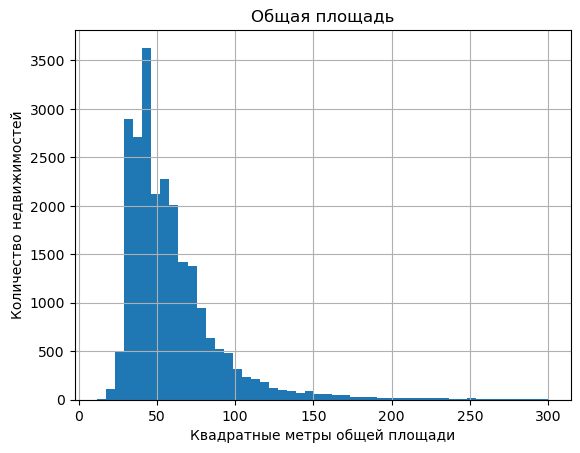

In [57]:
# Общая площадь
data['total_area'].hist(bins=50)
plt.title('Общая площадь')
plt.xlabel('Квадратные метры общей площади')
plt.ylabel('Количество недвижимостей');

In [58]:
# Проверим числовое описание данных
data['total_area'].describe()

count    23527.000000
mean        59.377482
std         30.329281
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 59.377, среднее 30.329. Студий и квартир более 140кв м меньше всего. Самое большое колличесво недвижимости приходится на 52кв м, что примерно равно площали 1-2 комнатных квартир.

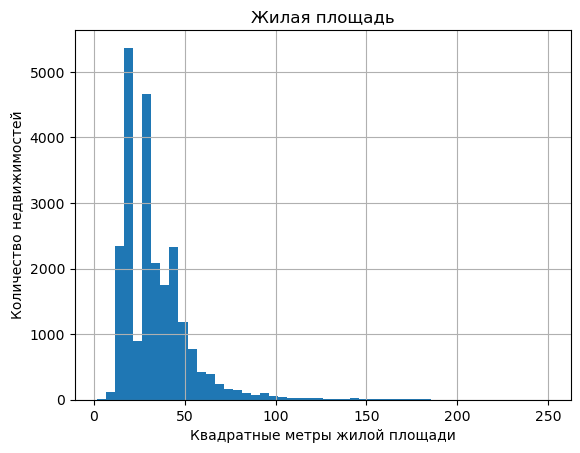

In [59]:
# Жилая площадь
data['living_area'].hist(bins=50)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры жилой площади')
plt.ylabel('Количество недвижимостей');

In [60]:
# Проверим числовое описание данных
data['living_area'].describe()

count    23527.000000
mean        33.821227
std         19.431063
min          2.000000
25%         18.400000
50%         30.290000
75%         42.500000
max        250.000000
Name: living_area, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 33.821, среднее 19.431. Самое большое количество недвижимостей приходится на площадь с медианным значением. Основные 2 пика, которые характерны одно и двух комнытным квартирам. 

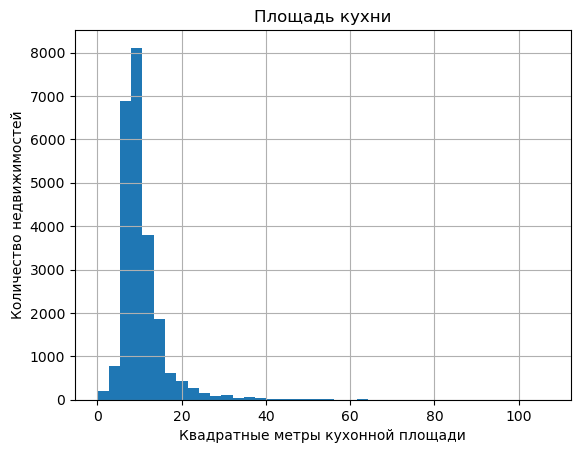

In [61]:
# площадь кухни
data['kitchen_area'].hist(bins=40)
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры кухонной площади')
plt.ylabel('Количество недвижимостей');

In [62]:
# Проверим числовое описание данных
data['kitchen_area'].describe()

count    23527.000000
mean        10.310181
std          5.491870
min          0.000000
25%          7.200000
50%          9.040000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

По графику видим распределение Пуассона становится симметричным и стремится к нормальному. Медианное значение равно 10.31, среднее 5.492. Основные пики приходятся на 9 кв м. Кухонь с площадью более 18 кв м значительно меньше.

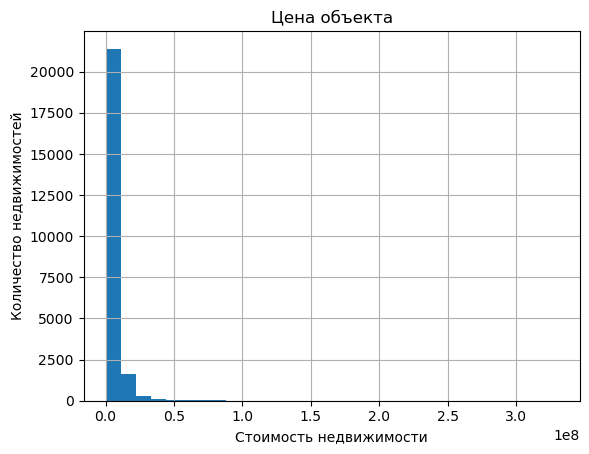

In [63]:
#цена объекта
data['last_price'].hist(bins=30)
plt.title('Цена объекта')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество недвижимостей');

In [64]:
# Проверим числовое описание данных
data['last_price'].describe()

count    2.352700e+04
mean     6.294717e+06
std      7.727358e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.610000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 6.294мл, среднее 7.727мл. Средняя стоимость квартир от 3.4 до 6.8 миллионов рублей.

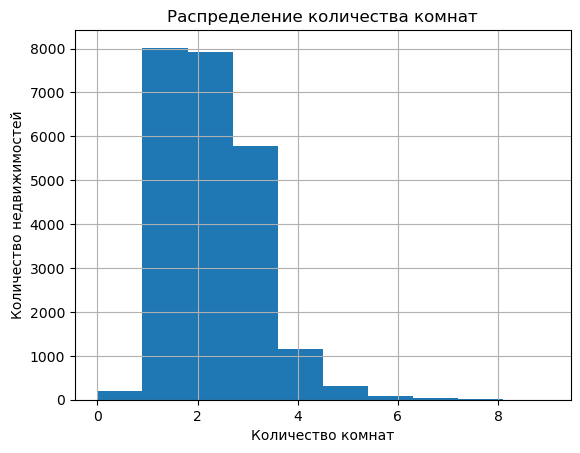

In [65]:
#количество комнат
data['rooms'].hist(bins=10)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество недвижимостей');

In [66]:
# Проверим числовое описание данных
data['rooms'].describe()

count    23527.000000
mean         2.054406
std          1.029703
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно  2.05, среднее 1.03. Самое большое количество приходится на двухкомнатные квартиры, 5и и студий комнатных существенно меньше.

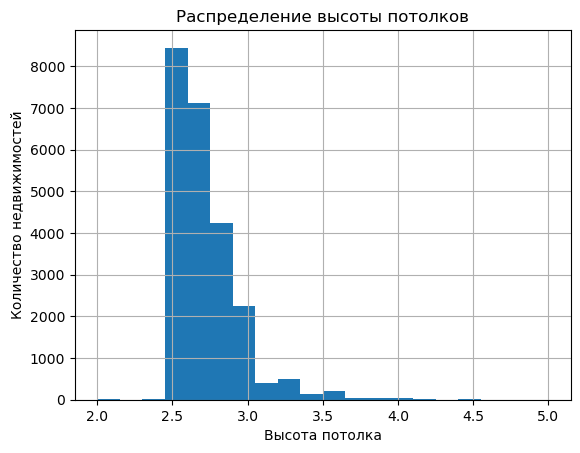

In [67]:
#высота потолков
data['ceiling_height'].hist(bins=20)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество недвижимостей');

In [68]:
# Проверим числовое описание данных
data['ceiling_height'].describe()

count    23527.000000
mean         2.705257
std          0.227286
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 2.71, среднее 0.23. Самое большое количество недвижимостей приходится на высоту потолков 2,5.

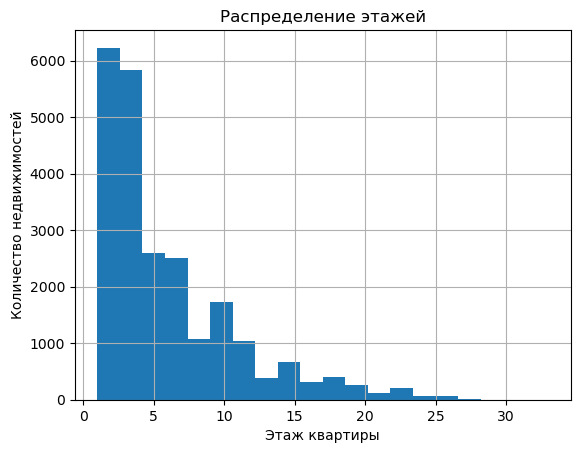

In [69]:
#этаж квартиры
data['floor'].hist(bins=20)
plt.title('Распределение этажей')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество недвижимостей');

In [70]:
# Проверим числовое описание данных
data['floor'].describe()

count    23527.000000
mean         5.896502
std          4.882357
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 5.9, среднее 4.9. Больше всего квартир продаётся на 1-4 этажах. Домов, где продаются крастиры с 13 этажа, существенно меньше.

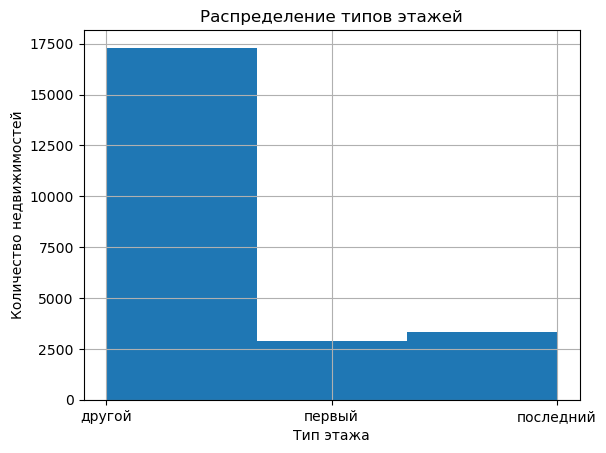

In [71]:
#тип этажа квартиры
data['type_floor'].hist(bins=3)
plt.title('Распределение типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество недвижимостей');

Практически одиноковое количесво недвижимостей подаётся на первом и последних этажах.

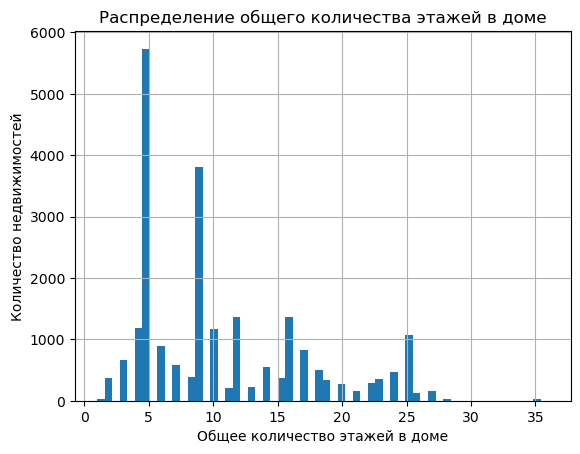

In [72]:
#общее количество этажей в доме;
data['floors_total'].hist(bins=60)
plt.title('Распределение общего количества этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество недвижимостей');

In [73]:
# Проверим числовое описание данных
data['floors_total'].describe()

count    23527.000000
mean        10.692779
std          6.574372
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

По графику видим распределение Пуассона. Медианное значение равно 10.69, среднее 6.57. Самое большое количесвво 5 этажных домов, так же пик приходится на 9ти этажные здания.

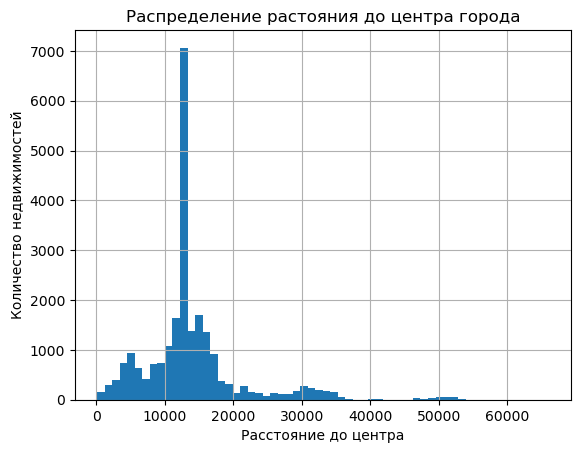

In [74]:
#расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=60)
plt.title('Распределение растояния до центра города')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество недвижимостей');

In [75]:
# Проверим числовое описание данных
data['cityCenters_nearest'].describe()

count    23527.000000
mean     14001.607897
std       7589.990823
min        181.000000
25%      10978.500000
50%      13107.000000
75%      15337.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Медианное значение равно 23527, среднее 14001.6 Самое большое количество недвижимостей приходится на медианное значение растояния до цетра города. Большенство квартир находится дальше 18000м от центра города.

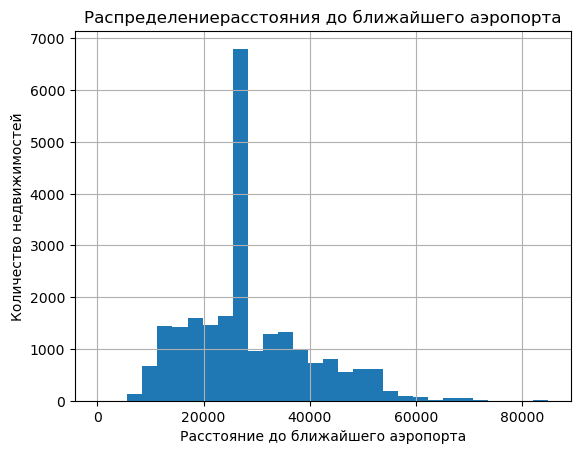

In [76]:
#расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=30)
plt.title('Распределениерасстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество недвижимостей');

In [77]:
# Проверим числовое описание данных
data['airports_nearest'].describe()

count    23527.000000
mean     28407.517576
std      11186.447661
min          0.000000
25%      21176.000000
50%      26757.500000
75%      34551.500000
max      84869.000000
Name: airports_nearest, dtype: float64

Медианное значение равно 23527, среднее 28407.5 Самое большое количество недвижимостей приходится на медианное значение растояния до ближайшего аэропорта. Квартир, которые находятся близко к аэропоту не так много.

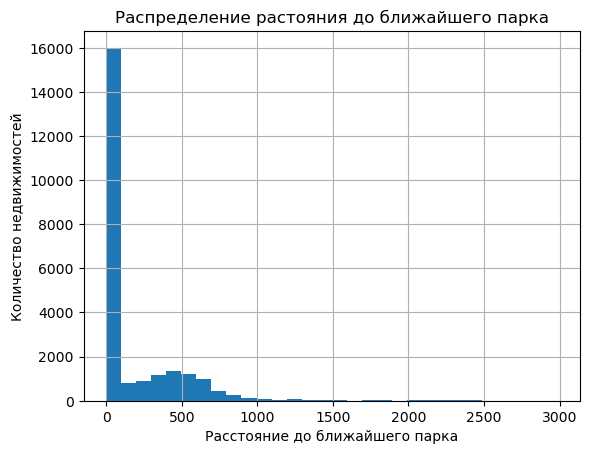

In [78]:
#расстояние до ближайшего парка;
data['parks_nearest'].hist(bins=30)
plt.title('Распределение растояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество недвижимостей');

In [79]:
# Проверим числовое описание данных
data['parks_nearest'].describe()

count    23527.000000
mean       166.451821
std        304.360774
min          0.000000
25%          0.000000
50%          0.000000
75%        300.000000
max       2984.000000
Name: parks_nearest, dtype: float64

Нулём мы заполнили пустые значения, тк в радиусе 3км не было парков. Если не учитывать данный факт, то видим нормальное распределение. Медианное значение равно 166.4, среднее 304.3. Так же есть пик на 400м.

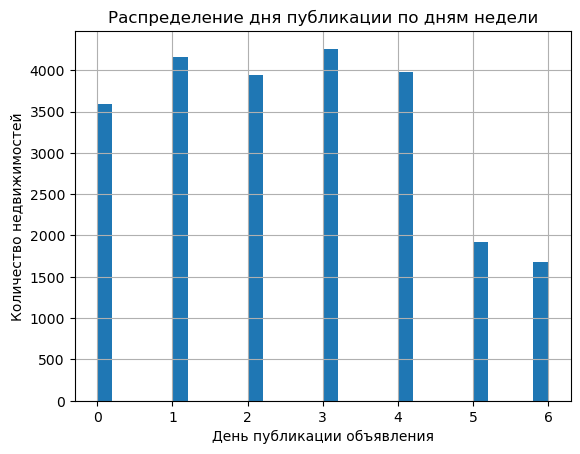

In [80]:
#день публикации объявления
data['day_week'].hist(bins=30)
plt.title('Распределение дня публикации по дням недели')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество недвижимостей');

Меньше всего публикащий приходится на выходные дни

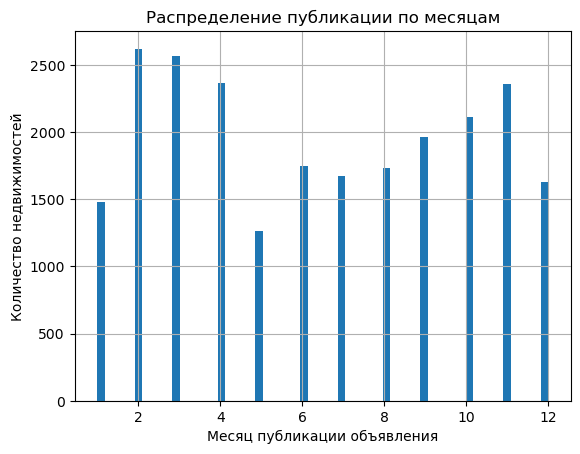

In [81]:
#месяц публикации объявления.
data['month_publication'].hist(bins=60)
plt.title('Распределение публикации по месяцам')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество недвижимостей');

Большое количесвво приходится на февраль, март, апрель. В период праздников в январе и мае публикаций существенно меньше. 

По графикам видно, что большое количество недвижимостей приходится на медианное значение, которым заполняли пропуски в данных.

### Продажа недвижимости <a id="sale"></a>

In [82]:
data['days_exposition'].mean()

169.1015854125048

In [83]:
data['days_exposition'].median()

95.0

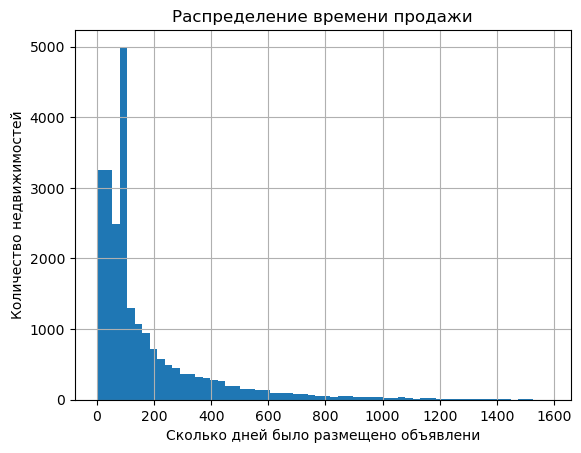

In [84]:
data['days_exposition'].hist(bins=60)
plt.title('Распределение времени продажи')
plt.xlabel('Сколько дней было размещено объявлени')
plt.ylabel('Количество недвижимостей');

Основной пик недвижимостей приходится на медианное значение, которым заполняли пропуски в даных. Среднее время продажи 101 день. У квартир, у которых время продажи меньше 101 дня - быстрые, больше - долгие.

(-10.0, 600.0)

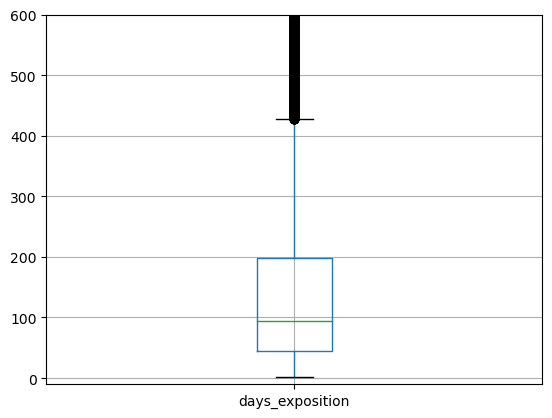

In [85]:
# Построим диаграмму размаха
data.boxplot('days_exposition') 
plt.ylim(-10, 600)

Видим больше количество выбросов, где продажа недвижимости занимала более 427 дней. Проверим числовое описание данных

In [86]:
data['days_exposition'].describe()

count    23527.000000
mean       169.101585
std        206.303850
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальный срок обявления 1 день, максимальное 1580 (более 4х лет), проверим какие это были объявления

In [87]:
data.query('days_exposition == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_week,month_publication,year_of_publication,type_floor,cityCenters_nearest_kilometer
1617,19,4000000.0,49.9,2019-05-01,2,2.5,9,25.0,1,False,...,20.0,1,681.0,1,80160.320641,2,5,2019,первый,14.0


In [88]:
data.query('days_exposition == 1580')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_week,month_publication,year_of_publication,type_floor,cityCenters_nearest_kilometer
18714,11,3500000.0,48.2,2014-12-15,2,2.5,5,27.4,2,False,...,0.0,1,31.0,1580,72614.107884,0,12,2014,другой,13.0


Подозрительных данных не видно. Возможно выставив объявление, передумали продавать квартиру, и убрали объявление на следующий день или забыли убрать вовсе.

Первый квартиль равен 45 дням, третий 198, те межквартильный размах 45-198 дней.

### Факторы, влияющие на общую стоимость объекта  <a id="factors"></a>

In [89]:
# Запишм в отдельный датасает колонки, по которых хотим узнать зависимость стоимости объекта
data_corr = data[['last_price', 'total_area', 'kitchen_area', 'rooms', 'type_floor', 'day_week', 'month_publication', 'year_of_publication' ]]

In [90]:
# Узнаем коэффициент Пирсона относительно цены
data_corr.corr().head(1)

,last_price,total_area,kitchen_area,rooms,day_week,month_publication,year_of_publication
last_price,1.0,0.676441,0.498789,0.394439,-0.007004,0.001333,-0.047425


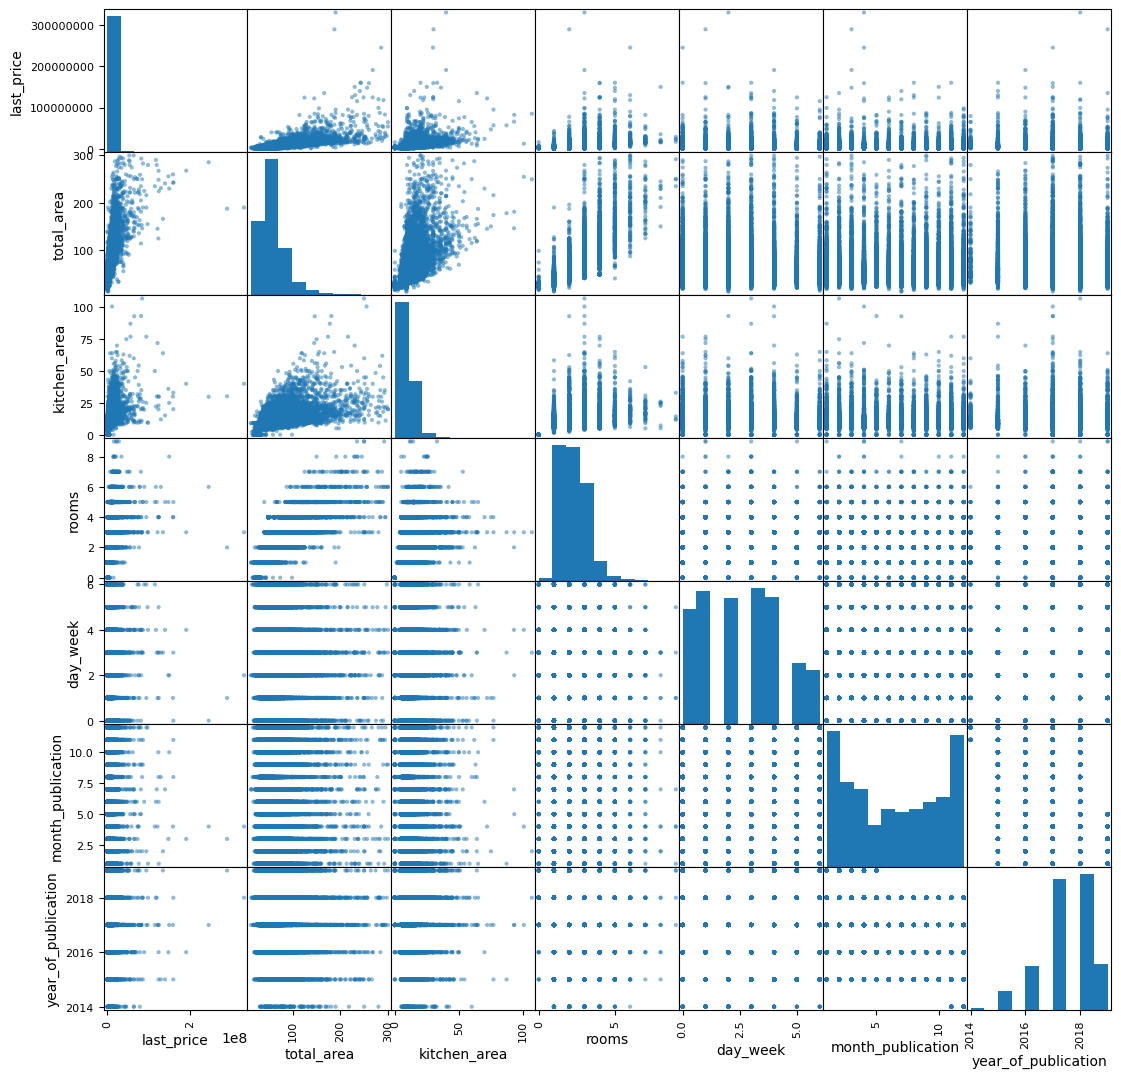

In [91]:
# Построим диаграмму рассеивания
pd.plotting.scatter_matrix(data_corr, figsize=(13, 13));

Видим, что самый большой фактор влияющий на стоимость квартиры это общая площать. Площать кухни и и количество комнат примерно в равной степени влияют на стоимоть. День рубликаци и месяц не вляют на стоимость. Кореляция года публикации близится у нулю, но год так же важный фактор.

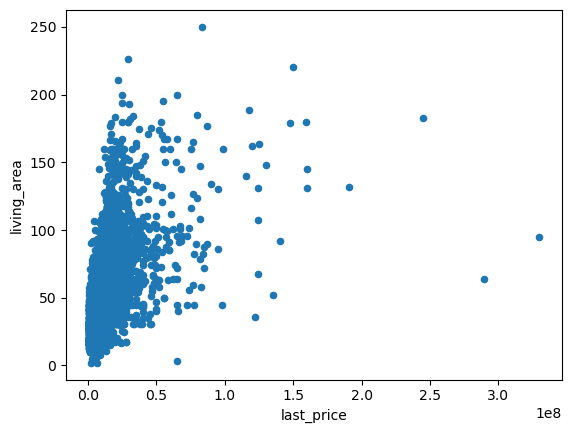

In [92]:
data.plot(x='last_price', y='living_area', kind='scatter');

In [93]:
data['last_price'].corr(data['living_area'])

0.5727891334386381

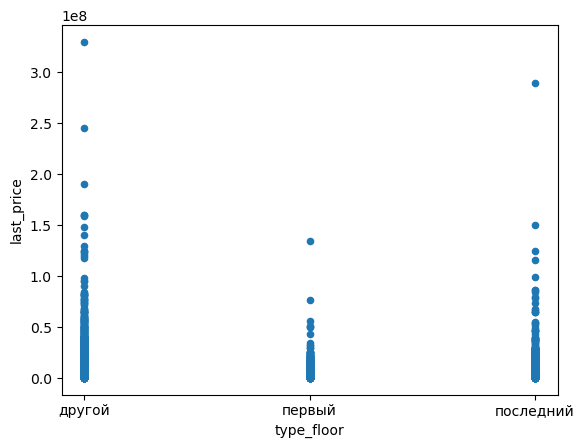

In [94]:
data.plot(x='type_floor', y='last_price', kind='scatter');

По графикам видим, что больше всего на стоимость влияет общая площать, затем идут желая площадь, площадь кухни, количество комнат. Большенсво квартир находились не на первом и не на последнем этажах, изходя из предудущей гстограммы, точно сказать не можем вдияет ли стоимоть, тк количество отличается. Ден, неделя, год стремятся к нулю и их значения не влияют на стоимость.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений <a id="str"></a>

In [95]:
price_of_one_square_meter_name = data.groupby('locality_name').agg({'price_of_one_square_meter':['count','mean']})
price_of_one_square_meter_name.columns = ['count','mean']
price_of_one_square_meter_name.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15618,114335.454249
поселок Мурино,555,85666.774786
поселок Шушары,440,78677.364217
Всеволожск,396,68723.855138
Пушкин,367,103130.851744
Колпино,337,75333.295801
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Выделим населённые пункты с самой высокой стоимостью квадратного метра.

In [96]:
price_of_one_square_meter_name.query('mean == mean.max()')

,count,mean
locality_name,,
Зеленогорск,24,115122.799198


Выделим населённые пункты с самой низкой стоимостью квадратного метра.

In [97]:
price_of_one_square_meter_name.query('mean == mean.min()')

,count,mean
locality_name,,
деревня Старополье,3,11206.221198


Населённый пункт с самой высокой стоимостью квадратного метра - Зеленогорск, с самой низкой - деревня Старополье.

### Средняя цена каждого километра <a id="str2"></a>

In [98]:
# Создадим новый датафрейм по СПб, и добавим коломку со средней церой за километр
locality_spb = data.query('locality_name == "Санкт-Петербург"')
locality_spb['average_price_kilometer'] = locality_spb['last_price'] / locality_spb['cityCenters_nearest_kilometer']

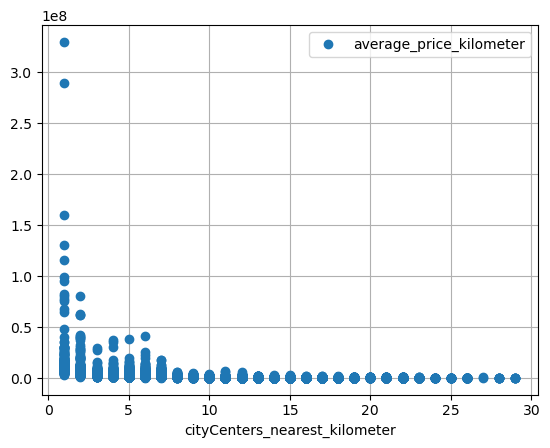

In [99]:
# Построим график
locality_spb.plot(x='cityCenters_nearest_kilometer', y='average_price_kilometer', style='o', grid=True);

Можем сделать вывод, что чем выше цена, тем меньше растояние до ценра.

## Вывод <a id="and"></a>

Были предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определили пустые значения, предложили логичную замену. Изменили типы данных, устранили не явные дубликаты. Исключили из анализа редкие и выбивающиеся значения, квартира за 12190р, где высота потолков более 25м, недвижимости с более 10 комнатами, квартиры, находящиеся выше 53 этажа, и собственности, растояние которых до парка не соответвуюет условию. Для дальнейшего анализа добавили данные: цена одного квадратного метра, день недели месяц год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах. 
Изучили параметры объектов, выяснили, что самое большое колличесво недвижимости приходится на 52кв м, что примерно равно площали 1-2 комнатных квартир, средняя стоимость квартир от 3.4 до 6.8 миллионов рублей, больше всего квартир продаётся на 1-4 этажах. Домов, где продаются крастиры с 13 этажа, существенно меньше. Практически одинаковое количесво недвижимостей подаётся на первом и последних этажах. Большенство квартир находится дальше 18000м от центра города и Меньше всего публикащий приходится на выходные дни, а больше всего приходится на февраль, март, апрель. В среднем квартиры продаются за 45-198 дней. Основной фактор влияющий на стоимоть квартиры это общая площадь, и чем выше цена, тем меньше растояние до ценра.

[Начало](#head)